In [2]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import random
from datetime import datetime
import numpy as np
import re
import os
import geopandas as gpd

font_path = r'C:/Users/user/NanumFontSetup_TTF_ALL/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path, size=18).get_name()
rc('font',family=font_name)

In [37]:
data_path = 'C:\\Data Analysis\\부평구 상권분석\\data\\유동인구\\부평구 유동인구데이터 및 주거, 직장인구 데이터\\부평구 유동인구데이_(201901_202012)\\시간대'
data_list = os.listdir(os.path.join(data_path))
data_list = data_list[1:13]
data_list

['부평_FLOW_TIME_201901.CSV',
 '부평_FLOW_TIME_201902.CSV',
 '부평_FLOW_TIME_201903.CSV',
 '부평_FLOW_TIME_201904.CSV',
 '부평_FLOW_TIME_201905.CSV',
 '부평_FLOW_TIME_201906.CSV',
 '부평_FLOW_TIME_201907.CSV',
 '부평_FLOW_TIME_201908.CSV',
 '부평_FLOW_TIME_201909.CSV',
 '부평_FLOW_TIME_201910.CSV',
 '부평_FLOW_TIME_201911.CSV',
 '부평_FLOW_TIME_201912.CSV']

In [39]:
store_path = os.path.join(data_path,'구분자 변환')

for i,file_name in enumerate(data_list):
    # 빈 dataframe 생성
    new_data = pd.DataFrame(columns=range(28))
        
    # 파일 오픈
    with open(os.path.join(data_path,file_name)) as f:
        for count, line in enumerate(f.readlines()):
            line = line.replace('|',',').strip('\n')
            split_data = line.split(',')
        
            # 컬럼명 생성
            if count == 0:
                new_data.columns = split_data
                cn = split_data
                continue
            
            # 레코드 생성
            row = {}
            for idx in range(len(split_data)):
                row[cn[idx]] = split_data[idx]
        
            df_temp = pd.DataFrame.from_dict([row])
        
            new_data = pd.concat([new_data,df_temp],axis=0,ignore_index=True)

    new_data.to_csv(os.path.join(store_path,'시간대별유동인구_'+file_name[-10:]),index=False)
    print('진행률 : {}%'.format(round(((i+1)/len(data_list))*100,2)))
                                

진행률 : 8.33%
진행률 : 16.67%
진행률 : 25.0%
진행률 : 33.33%
진행률 : 41.67%
진행률 : 50.0%
진행률 : 58.33%
진행률 : 66.67%
진행률 : 75.0%
진행률 : 83.33%
진행률 : 91.67%
진행률 : 100.0%


In [36]:
new_data.shape

(9889, 11)

# 1. 기초구역 데이터


In [67]:
load_path = 'C:\\Data Analysis\\부평구 상권분석\\data\\전처리 파일\\부평구_기초구역_5181\\부평구_기초구역_5181.shp'
basis_area = gpd.read_file(load_path)[['BAS_ID','geometry']]
basis_area

,BAS_ID,geometry
0,21459,"POLYGON ((176641.304 442645.152, 176647.527 44..."
1,21384,"POLYGON ((174332.882 443549.806, 174341.717 44..."
2,21403,"POLYGON ((176460.207 443392.656, 176503.040 44..."
3,21447,"POLYGON ((173371.315 442923.042, 173431.784 44..."
4,21421,"POLYGON ((176813.663 442559.317, 176802.418 44..."
...,...,...
156,21423,"POLYGON ((176671.251 442643.859, 176686.836 44..."
157,21441,"POLYGON ((173892.886 442465.677, 173876.623 44..."
158,21446,"POLYGON ((173718.851 441369.606, 173717.873 44..."
159,21453,"POLYGON ((173523.162 441167.346, 173522.717 44..."


# 2. 성연령별 유동인구

In [101]:
pop_by_sex_path = '../data/유동인구/부평구 유동인구데이터 및 주거, 직장인구 데이터/부평구 유동인구데이_(201901_202012)/성연령/기초구역별 성연령유동인구'
sex_data_name_list = [name for name in os.listdir(pop_by_sex_path) if name.endswith('.shp')]
sex_data_name_list

['기초구역별_성연령유동인구_201901.shp',
 '기초구역별_성연령유동인구_201902.shp',
 '기초구역별_성연령유동인구_201903.shp',
 '기초구역별_성연령유동인구_201904.shp',
 '기초구역별_성연령유동인구_201905.shp',
 '기초구역별_성연령유동인구_201906.shp',
 '기초구역별_성연령유동인구_201907.shp',
 '기초구역별_성연령유동인구_201908.shp',
 '기초구역별_성연령유동인구_201909.shp',
 '기초구역별_성연령유동인구_201910.shp',
 '기초구역별_성연령유동인구_201911.shp',
 '기초구역별_성연령유동인구_201912.shp']

In [102]:
# 데이터 로딩 및 결합
merge_df = gpd.GeoDataFrame(columns=range(28))

for i,name in enumerate(sex_data_name_list):
    geo_df = gpd.read_file(os.path.join(pop_by_sex_path,name))
    if i ==0:
        merge_df.columns = list(geo_df)

    merge_df = pd.concat([merge_df,geo_df],axis=0,ignore_index=True)
    
merge_df.shape

(157353, 28)

In [103]:
merge_df.head()

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,...,MAN_FLOW_3,MAN_FLOW_4,MAN_FLOW_5,WMAN_FLOW_,WMAN_FLO_1,WMAN_FLO_2,WMAN_FLO_3,WMAN_FLO_4,WMAN_FLO_5,geometry
0,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,...,0.5,0.55,0.58,0.1,0.25,0.41,0.39,0.4,0.35,"POLYGON ((176641.304 442645.152, 176647.527 44..."
1,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,...,28.82,19.01,16.24,13.2,24.86,44.22,28.61,28.75,23.89,"POLYGON ((176641.304 442645.152, 176647.527 44..."
2,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,...,0.01,0.02,0.01,0,0,0,0,0,0,"POLYGON ((176641.304 442645.152, 176647.527 44..."
3,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,...,0.18,0.23,0.24,0.03,0.06,0.12,0.12,0.19,0.14,"POLYGON ((176641.304 442645.152, 176647.527 44..."
4,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,...,0.14,0.1,0.12,0.02,0.07,0.09,0.06,0.09,0.06,"POLYGON ((176641.304 442645.152, 176647.527 44..."


In [105]:
merge_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 157353 entries, 0 to 157352
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   BAS_AR      157353 non-null  float64 
 1   BAS_ID      157353 non-null  object  
 2   BAS_MGT_SN  157353 non-null  object  
 3   CTP_KOR_NM  157353 non-null  object  
 4   MVMN_DE     0 non-null       object  
 5   MVMN_RESN   0 non-null       object  
 6   NTFC_DE     157353 non-null  object  
 7   OPERT_DE    0 non-null       object  
 8   SIG_CD      157353 non-null  object  
 9   SIG_KOR_NM  157353 non-null  object  
 10  field_1     157353 non-null  object  
 11  STD_YM      157353 non-null  object  
 12  BLOCK_CD    157353 non-null  object  
 13  X_COORD     157353 non-null  object  
 14  Y_COORD     157353 non-null  object  
 15  MAN_FLOW_P  157353 non-null  object  
 16  MAN_FLOW_1  157353 non-null  object  
 17  MAN_FLOW_2  157353 non-null  object  
 18  MAN_FLOW_3  1573

In [106]:
# 사용하고자하는 컬럼만 추출
use_col = ['BAS_ID','STD_YM']+list(merge_df)[15:27]
use_data = merge_df.loc[:,use_col]
use_data

,BAS_ID,STD_YM,MAN_FLOW_P,MAN_FLOW_1,MAN_FLOW_2,MAN_FLOW_3,MAN_FLOW_4,MAN_FLOW_5,WMAN_FLOW_,WMAN_FLO_1,WMAN_FLO_2,WMAN_FLO_3,WMAN_FLO_4,WMAN_FLO_5
0,21459,201901,0.1,0.33,0.56,0.5,0.55,0.58,0.1,0.25,0.41,0.39,0.4,0.35
1,21459,201901,13.14,24.26,34.48,28.82,19.01,16.24,13.2,24.86,44.22,28.61,28.75,23.89
2,21459,201901,0,0,0,0.01,0.02,0.01,0,0,0,0,0,0
3,21459,201901,0.05,0.06,0.11,0.18,0.23,0.24,0.03,0.06,0.12,0.12,0.19,0.14
4,21459,201901,0.02,0.06,0.19,0.14,0.1,0.12,0.02,0.07,0.09,0.06,0.09,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157348,21432,201912,0.18,0.21,0.34,0.4,0.4,0.35,0.16,0.2,0.33,0.48,0.34,0.31
157349,21432,201912,0.08,0.09,0.17,0.22,0.2,0.16,0.06,0.09,0.18,0.23,0.16,0.11
157350,21432,201912,0.06,0.09,0.14,0.14,0.16,0.13,0.06,0.08,0.12,0.18,0.12,0.09
157351,21432,201912,0.08,0.09,0.16,0.18,0.2,0.16,0.06,0.09,0.16,0.23,0.14,0.09


In [107]:
# 널 값 체크 및 제거
use_data.isnull().sum()

BAS_ID        0
STD_YM        0
MAN_FLOW_P    0
MAN_FLOW_1    0
MAN_FLOW_2    0
             ..
WMAN_FLO_1    0
WMAN_FLO_2    0
WMAN_FLO_3    0
WMAN_FLO_4    0
WMAN_FLO_5    0
Length: 14, dtype: int64

In [108]:
use_data['STD_YM'] = use_data['STD_YM'].apply(lambda x : datetime.strptime(x,'%Y%m'))
use_data.iloc[:,2:]= use_data.iloc[:,2:].apply(lambda x : x.astype(float))
use_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 157353 entries, 0 to 157352
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BAS_ID      157353 non-null  object        
 1   STD_YM      157353 non-null  datetime64[ns]
 2   MAN_FLOW_P  157353 non-null  float64       
 3   MAN_FLOW_1  157353 non-null  float64       
 4   MAN_FLOW_2  157353 non-null  float64       
 5   MAN_FLOW_3  157353 non-null  float64       
 6   MAN_FLOW_4  157353 non-null  float64       
 7   MAN_FLOW_5  157353 non-null  float64       
 8   WMAN_FLOW_  157353 non-null  float64       
 9   WMAN_FLO_1  157353 non-null  float64       
 10  WMAN_FLO_2  157353 non-null  float64       
 11  WMAN_FLO_3  157353 non-null  float64       
 12  WMAN_FLO_4  157353 non-null  float64       
 13  WMAN_FLO_5  157353 non-null  float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 16.8+ MB


## 2.1 기초구역별, 월별 합계

In [109]:
agg_use_data = use_data.groupby(['BAS_ID','STD_YM']).sum().reset_index()
agg_use_data

,BAS_ID,STD_YM,MAN_FLOW_P,MAN_FLOW_1,MAN_FLOW_2,MAN_FLOW_3,MAN_FLOW_4,MAN_FLOW_5,WMAN_FLOW_,WMAN_FLO_1,WMAN_FLO_2,WMAN_FLO_3,WMAN_FLO_4,WMAN_FLO_5
0,21300,2019-01-01,151.86,710.76,1695.89,2160.37,2782.87,2008.89,134.49,361.58,704.48,861.97,1142.15,690.62
1,21300,2019-02-01,174.38,707.57,1646.58,2060.74,2698.62,1963.04,154.56,374.16,714.07,862.72,1139.55,694.79
2,21300,2019-03-01,156.39,708.86,1672.72,2171.23,2854.29,2075.04,143.97,371.93,717.47,905.39,1217.50,741.04
3,21300,2019-04-01,149.44,747.70,1549.50,2019.34,2575.09,1867.49,132.72,347.08,676.47,855.36,1126.33,701.16
4,21300,2019-05-01,176.82,805.60,1609.31,2082.52,2687.40,1909.34,159.59,369.46,726.00,907.80,1182.68,731.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,21460,2019-08-01,388.32,913.65,1870.59,2584.66,2738.90,1834.57,431.42,562.77,958.19,1167.27,1242.25,853.36
1928,21460,2019-09-01,406.09,932.91,2007.44,2733.57,2917.16,1966.96,455.96,654.70,1007.29,1240.96,1313.09,910.85
1929,21460,2019-10-01,304.66,777.63,1713.73,2346.16,2486.34,1774.43,351.06,515.93,842.12,1049.03,1188.99,847.27
1930,21460,2019-11-01,316.07,954.79,2028.13,2743.91,2847.56,1860.78,350.80,617.75,961.98,1182.94,1222.44,833.79


In [110]:
man_10_to_30 = agg_use_data.iloc[:,2:5].agg('sum',axis=1)
woman_10_to_30 = agg_use_data.iloc[:,8:11].agg('sum',axis=1)

man_40_to_60 = agg_use_data.iloc[:,5:8].agg('sum',axis=1)
woman_40_to_60 = agg_use_data.iloc[:,11:14].agg('sum',axis=1)

agg_use_data['10대_30대 총합'] = man_10_to_30+woman_10_to_30
agg_use_data['40대_60대 총합'] = man_40_to_60+woman_40_to_60

agg_use_data.iloc[:,-2:]

,10대_30대 총합,40대_60대 총합
0,3759.06,9646.87
1,3771.32,9419.46
2,3771.34,9964.49
3,3602.91,9144.77
4,3846.78,9500.76
...,...,...
1927,5124.94,10421.01
1928,5464.39,11082.59
1929,4505.13,9692.22
1930,5229.52,10691.42


In [111]:
# 먼저 비율을 생성한다.
agg_use_data['10_30 / 40_60'] = agg_use_data['10대_30대 총합']/ agg_use_data['40대_60대 총합']

# 그리고 평균 집계
ratio_avg = agg_use_data.groupby('BAS_ID')['10_30 / 40_60'].agg(['min','mean','max','std']).reset_index()
ratio_avg[ratio_avg['std'] > 0.05].sort_values(by='std')

,BAS_ID,min,mean,max,std
62,21362,0.521486,0.610913,0.677081,0.050844
45,21345,0.562631,0.656485,0.704558,0.051517
85,21385,0.500343,0.593100,0.635909,0.051971
52,21352,0.515050,0.615043,0.668400,0.057282
156,21456,0.376029,0.451358,0.522629,0.058451
...,...,...,...,...,...
56,21356,0.599022,0.725145,0.803396,0.073930
61,21361,0.523145,0.650776,0.720669,0.074088
134,21434,0.551794,0.654999,0.788348,0.084544
144,21444,0.605138,0.704440,0.827848,0.085842


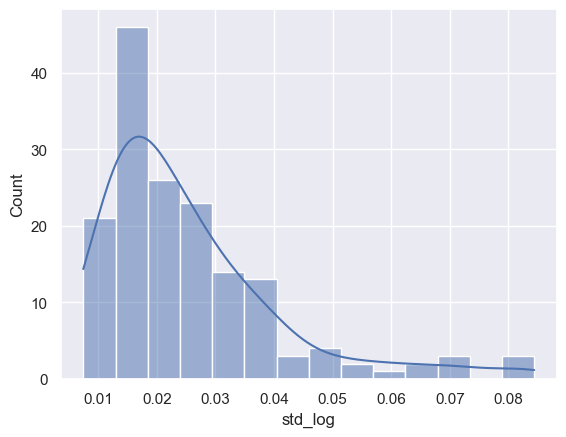

In [112]:
ratio_avg['std_log'] = ratio_avg['std'].apply(lambda x : np.log1p(x))
sns.histplot(ratio_avg,x='std_log',kde=True)
plt.show()

## 2.2 2019년 10대_30대 총합 vs 40대_60대 이상 총합

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
img_store_path = r'C:\Data Analysis\부평구 상권분석\data\유동인구\부평구 유동인구데이터 및 주거, 직장인구 데이터\부평구 유동인구데이_(201901_202012)\성연령\10대_30대 vs 40대_60대 총합'

for bas_id in list(agg_use_data['BAS_ID'].unique()):
    basis_area_pop = agg_use_data.loc[agg_use_data['BAS_ID']==bas_id,['BAS_ID','STD_YM','10대_30대 총합','40대_60대 총합']]
    
    fig, axes = plt.subplots(2,1,figsize=(20,10),constrained_layout=True)
    sns.set_theme(style="darkgrid")      
    sns.lineplot(ax=axes[0], x="STD_YM", y="10대_30대 총합",data=basis_area_pop,color='green')
    sns.lineplot(ax=axes[1], x="STD_YM", y="40대_60대 총합",data=basis_area_pop,color='magenta')
    plt.savefig(os.path.join(img_store_path,bas_id+'.png'))

## 2.3 기초구역별 평균

In [115]:
pd.set_option('display.max_rows', 10)

In [116]:
avg_by_basis = agg_use_data.groupby('BAS_ID').mean().reset_index()
avg_by_basis

,BAS_ID,MAN_FLOW_P,MAN_FLOW_1,MAN_FLOW_2,MAN_FLOW_3,MAN_FLOW_4,MAN_FLOW_5,WMAN_FLOW_,WMAN_FLO_1,WMAN_FLO_2,WMAN_FLO_3,WMAN_FLO_4,WMAN_FLO_5,10대_30대 총합,40대_60대 총합,10_30 / 40_60
0,21300,163.553333,793.817500,1567.466667,1981.562500,2591.192500,1843.445000,142.843333,348.731667,657.232500,845.948333,1100.005000,677.526667,3673.645000,9039.680000,0.406895
1,21301,126.544167,543.299167,1248.825833,1561.706667,1815.817500,1254.365833,122.165000,289.260000,553.598333,676.703333,779.317500,471.751667,2883.692500,6559.662500,0.439757
2,21302,309.671667,857.984167,1858.447500,2266.131667,2500.637500,1777.150833,327.813333,604.885833,988.570000,1231.705000,1236.784167,715.551667,4947.372500,9727.960833,0.508371
3,21303,95.820000,265.517500,535.177500,653.233333,847.427500,664.617500,98.510833,177.690000,294.612500,396.898333,464.453333,292.910000,1467.328333,3319.540000,0.441902
4,21304,230.277500,515.371667,874.061667,1090.169167,1394.389167,1188.987500,224.445833,368.354167,561.971667,711.334167,823.592500,560.538333,2774.482500,5769.010833,0.479893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,21456,174.941667,278.781667,533.596667,690.982500,815.976667,879.150833,168.631667,249.401667,408.080000,491.850000,611.424167,597.762500,1813.433333,4087.146667,0.451358
157,21457,670.835000,2335.352500,4534.680833,5727.458333,5666.355833,3735.243333,668.248333,1389.433333,2252.286667,2621.791667,2631.296667,1729.971667,11850.836667,22112.117500,0.535500
158,21458,505.322500,847.580833,1370.280833,1410.946667,1478.905000,1607.125833,531.164167,741.658333,1105.110833,1210.950000,1317.325833,1333.739167,5101.117500,8358.992500,0.603346
159,21459,692.955000,2204.915833,3702.141667,4812.614167,4968.550833,3388.761667,749.327500,1170.565833,1871.565833,2206.496667,2307.264167,1654.208333,10391.471667,19337.895833,0.537024


In [117]:
man_10_to_30_avg = avg_by_basis.iloc[:,1:4].agg('sum',axis=1)
woman_10_to_30_avg = avg_by_basis.iloc[:,7:10].agg('sum',axis=1)

man_40_to_60_avg = avg_by_basis.iloc[:,4:7].agg('sum',axis=1)
woman_40_to_60_avg = avg_by_basis.iloc[:,10:13].agg('sum',axis=1)

avg_by_basis['10대_30대 평균'] = man_10_to_30_avg+woman_10_to_30_avg
avg_by_basis['40대_60대 평균'] = man_40_to_60_avg+woman_40_to_60_avg
avg_by_basis['10_30 / 40_60(평균)'] = avg_by_basis['10대_30대 평균'] / avg_by_basis['40대_60대 평균']
avg_by_basis['평균유동인구'] = avg_by_basis.iloc[:,1:13].agg('sum',axis=1)

In [118]:
column = list(avg_by_basis)
# avg_by_basis.drop(columns=column[-3:],inplace=True)
avg_by_basis

,BAS_ID,MAN_FLOW_P,MAN_FLOW_1,MAN_FLOW_2,MAN_FLOW_3,MAN_FLOW_4,MAN_FLOW_5,WMAN_FLOW_,WMAN_FLO_1,WMAN_FLO_2,WMAN_FLO_3,WMAN_FLO_4,WMAN_FLO_5,10대_30대 총합,40대_60대 총합,10_30 / 40_60,10대_30대 평균,40대_60대 평균,10_30 / 40_60(평균),평균유동인구
0,21300,163.553333,793.817500,1567.466667,1981.562500,2591.192500,1843.445000,142.843333,348.731667,657.232500,845.948333,1100.005000,677.526667,3673.645000,9039.680000,0.406895,3673.645000,9039.680000,0.406391,12713.325000
1,21301,126.544167,543.299167,1248.825833,1561.706667,1815.817500,1254.365833,122.165000,289.260000,553.598333,676.703333,779.317500,471.751667,2883.692500,6559.662500,0.439757,2883.692500,6559.662500,0.439610,9443.355000
2,21302,309.671667,857.984167,1858.447500,2266.131667,2500.637500,1777.150833,327.813333,604.885833,988.570000,1231.705000,1236.784167,715.551667,4947.372500,9727.960833,0.508371,4947.372500,9727.960833,0.508572,14675.333333
3,21303,95.820000,265.517500,535.177500,653.233333,847.427500,664.617500,98.510833,177.690000,294.612500,396.898333,464.453333,292.910000,1467.328333,3319.540000,0.441902,1467.328333,3319.540000,0.442028,4786.868333
4,21304,230.277500,515.371667,874.061667,1090.169167,1394.389167,1188.987500,224.445833,368.354167,561.971667,711.334167,823.592500,560.538333,2774.482500,5769.010833,0.479893,2774.482500,5769.010833,0.480929,8543.493333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,21456,174.941667,278.781667,533.596667,690.982500,815.976667,879.150833,168.631667,249.401667,408.080000,491.850000,611.424167,597.762500,1813.433333,4087.146667,0.451358,1813.433333,4087.146667,0.443692,5900.580000
157,21457,670.835000,2335.352500,4534.680833,5727.458333,5666.355833,3735.243333,668.248333,1389.433333,2252.286667,2621.791667,2631.296667,1729.971667,11850.836667,22112.117500,0.535500,11850.836667,22112.117500,0.535943,33962.954167
158,21458,505.322500,847.580833,1370.280833,1410.946667,1478.905000,1607.125833,531.164167,741.658333,1105.110833,1210.950000,1317.325833,1333.739167,5101.117500,8358.992500,0.603346,5101.117500,8358.992500,0.610255,13460.110000
159,21459,692.955000,2204.915833,3702.141667,4812.614167,4968.550833,3388.761667,749.327500,1170.565833,1871.565833,2206.496667,2307.264167,1654.208333,10391.471667,19337.895833,0.537024,10391.471667,19337.895833,0.537363,29729.367500


## 2.4 일표본 검정
- 표준편차가 0이라고 말할 수 있는지 검정해보자
- H0 : 표준편차의 평균이 0이다.(즉, 모든 기초구역에서 표준편차가 0이라고 말할 수 있겠는가?)
- H1 : 표준편차의 평균이 0이 아니다.

In [24]:
# 필요한 모듈 import
from scipy import stats

std = ratio_avg['std'].values

In [25]:
# 1. 정규성 검증
# 양적자료가 5000개 미만이므로 shapro-wilk test를 진행
stats.shapiro(x = std)

ShapiroResult(statistic=0.8130130767822266, pvalue=4.4523843704784294e-13)

In [26]:
# 2. 정규성 불만족, 윌콕슨 부호검정 시행
# 윌콕슨 부호검정 : 중위수를 검정할 때 사용된다.
stats.wilcoxon(std - std.mean(),alternative='two-sided')
# data.variable - mu : wilcoxon mu의 기본값은 0
# alternative : 대립가설
# 'greater'   = mu > 0
# 'less'      = mu < 0
# 'two-sided' = mu != 0

# 따라서 유의수준 99% 수준에서 표준편차의 평균은 0이라고 말할 수 있다.

WilcoxonResult(statistic=5124.0, pvalue=0.018419135138102182)

In [30]:
# geometry 정보 결합
sex_result = basis_area.merge(avg_by_basis,how='inner',right_on='BAS_ID',left_on='BAS_ID')
sex_result = sex_result.sort_values(by='BAS_ID').reset_index(drop=True)

# csv파일로 export
store_path = 'C:\\Data Analysis\\부평구 상권분석\\data\\전처리 파일'
sex_result.to_csv(os.path.join(store_path,'기초구역별 성연령 유동인구.csv'),index=False,encoding='euc-kr')

# 3. 요일별 유동인구

In [31]:
pop_by_day_path = '../data/유동인구/부평구 유동인구데이터 및 주거, 직장인구 데이터/부평구 유동인구데이_(201901_202012)/요일/기초구역별 요일유동인구'
day_data_name_list = [name for name in os.listdir(pop_by_day_path) if name.endswith('.shp')]
day_data_name_list

['기초구역별_요일유동인구_201901.shp',
 '기초구역별_요일유동인구_201902.shp',
 '기초구역별_요일유동인구_201903.shp',
 '기초구역별_요일유동인구_201904.shp',
 '기초구역별_요일유동인구_201905.shp',
 '기초구역별_요일유동인구_201906.shp',
 '기초구역별_요일유동인구_201907.shp',
 '기초구역별_요일유동인구_201908.shp',
 '기초구역별_요일유동인구_201909.shp',
 '기초구역별_요일유동인구_201910.shp',
 '기초구역별_요일유동인구_201911.shp',
 '기초구역별_요일유동인구_201912.shp']

In [32]:
# 데이터 로딩 및 결합
day_merge_df = gpd.GeoDataFrame(columns=range(23))

for i,name in enumerate(day_data_name_list):
    geo_df = gpd.read_file(os.path.join(pop_by_day_path,name))
    if i ==0:
        day_merge_df.columns = list(geo_df)

    day_merge_df = pd.concat([day_merge_df,geo_df],axis=0,ignore_index=True)
    print('진행률 : {:0.2f}%'.format((i+1)/12*100))
    
day_merge_df.shape

진행률 : 8.33%
진행률 : 16.67%
진행률 : 25.00%
진행률 : 33.33%
진행률 : 41.67%
진행률 : 50.00%
진행률 : 58.33%
진행률 : 66.67%
진행률 : 75.00%
진행률 : 83.33%
진행률 : 91.67%
진행률 : 100.00%


(159840, 23)

In [77]:
day_merge_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 159840 entries, 0 to 159839
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   BAS_AR      159840 non-null  float64 
 1   BAS_ID      159840 non-null  object  
 2   BAS_MGT_SN  159840 non-null  object  
 3   CTP_KOR_NM  159840 non-null  object  
 4   MVMN_DE     0 non-null       object  
 5   MVMN_RESN   0 non-null       object  
 6   NTFC_DE     159840 non-null  object  
 7   OPERT_DE    0 non-null       object  
 8   SIG_CD      159840 non-null  object  
 9   SIG_KOR_NM  159840 non-null  object  
 10  field_1     159840 non-null  object  
 11  STD_YM      159840 non-null  object  
 12  BLOCK_CD    159840 non-null  object  
 13  X_COORD     159840 non-null  object  
 14  Y_COORD     159840 non-null  object  
 15  FLOW_POP_C  159840 non-null  object  
 16  FLOW_POP_1  159840 non-null  object  
 17  FLOW_POP_2  159840 non-null  object  
 18  FLOW_POP_3  1598

In [78]:
# 필요컬럼 : 1, 11, 15-21
use_col = [1,11,15,16,17,18,19,21]
use_day_data = day_merge_df.iloc[:,use_col]
use_day_data

,BAS_ID,STD_YM,FLOW_POP_C,FLOW_POP_1,FLOW_POP_2,FLOW_POP_3,FLOW_POP_4,FLOW_POP_6
0,21459,201901,4.16,4.76,4.35,4.31,4.69,4.24
1,21459,201901,275.54,299.98,301.44,301.02,299.41,1232.58
2,21459,201901,0.07,0.07,0.08,0.08,0.07,0.08
3,21459,201901,1.2,1.56,1.58,1.46,1.57,1.21
4,21459,201901,0.03,0.04,0.03,0.04,0.04,0
...,...,...,...,...,...,...,...,...
159835,21432,201912,2.6,2.68,11.53,2.81,2.79,1.87
159836,21432,201912,1.13,1.18,5.97,1.24,1.24,0.87
159837,21432,201912,1.11,1.15,4.06,1.2,1.2,0.55
159838,21432,201912,1.11,1.17,5.62,1.22,1.2,0.81


In [79]:
use_day_data['STD_YM'] = use_day_data['STD_YM'].apply(lambda x : datetime.strptime(x,'%Y%m'))
use_day_data.iloc[:,2:8] = use_day_data.iloc[:,2:8].apply(lambda x : x.astype(float))
use_day_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 159840 entries, 0 to 159839
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BAS_ID      159840 non-null  object        
 1   STD_YM      159840 non-null  datetime64[ns]
 2   FLOW_POP_C  159840 non-null  float64       
 3   FLOW_POP_1  159840 non-null  float64       
 4   FLOW_POP_2  159840 non-null  float64       
 5   FLOW_POP_3  159840 non-null  float64       
 6   FLOW_POP_4  159840 non-null  float64       
 7   FLOW_POP_6  159840 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 9.8+ MB


## 3.1 기초구역별, 월별 합계

In [80]:
agg_use_day_data = use_day_data.groupby(['BAS_ID','STD_YM']).sum().reset_index()
agg_use_day_data

,BAS_ID,STD_YM,FLOW_POP_C,FLOW_POP_1,FLOW_POP_2,FLOW_POP_3,FLOW_POP_4,FLOW_POP_6
0,21300,2019-01-01,13740.25,14083.07,14650.38,15040.57,15514.62,8952.51
1,21300,2019-02-01,13562.27,13631.15,13878.23,14819.64,15723.61,9705.63
2,21300,2019-03-01,15066.66,15147.75,15566.20,15010.32,14643.32,10606.02
3,21300,2019-04-01,13165.52,13375.81,13437.37,13209.26,14122.32,9341.45
4,21300,2019-05-01,13147.98,14577.30,13929.49,14060.35,14549.93,9870.06
...,...,...,...,...,...,...,...,...
1927,21460,2019-08-01,14663.62,15051.79,15491.48,14593.39,15875.85,16027.95
1928,21460,2019-09-01,15743.41,16034.12,16196.48,16059.52,19290.77,15863.90
1929,21460,2019-10-01,12556.83,14008.32,13558.08,12971.96,14119.24,15512.69
1930,21460,2019-11-01,13913.02,14486.81,14677.92,14965.79,16347.38,16860.25


## 3.2 주중 인구 / 주말 인구 비율 집계

In [81]:
agg_use_day_data['주중'] = agg_use_day_data.iloc[:,2:6].sum(axis=1)
agg_use_day_data['주말'] = agg_use_day_data.iloc[:,6:8].sum(axis=1)
agg_use_day_data['주중 / 주말'] = agg_use_day_data['주중'] / agg_use_day_data['주말']
agg_use_day_data

,BAS_ID,STD_YM,FLOW_POP_C,FLOW_POP_1,FLOW_POP_2,FLOW_POP_3,FLOW_POP_4,FLOW_POP_6,주중,주말,주중 / 주말
0,21300,2019-01-01,13740.25,14083.07,14650.38,15040.57,15514.62,8952.51,57514.27,24467.13,2.350675
1,21300,2019-02-01,13562.27,13631.15,13878.23,14819.64,15723.61,9705.63,55891.29,25429.24,2.197914
2,21300,2019-03-01,15066.66,15147.75,15566.20,15010.32,14643.32,10606.02,60790.93,25249.34,2.407625
3,21300,2019-04-01,13165.52,13375.81,13437.37,13209.26,14122.32,9341.45,53187.96,23463.77,2.266812
4,21300,2019-05-01,13147.98,14577.30,13929.49,14060.35,14549.93,9870.06,55715.12,24419.99,2.281537
...,...,...,...,...,...,...,...,...,...,...,...
1927,21460,2019-08-01,14663.62,15051.79,15491.48,14593.39,15875.85,16027.95,59800.28,31903.80,1.874394
1928,21460,2019-09-01,15743.41,16034.12,16196.48,16059.52,19290.77,15863.90,64033.53,35154.67,1.821480
1929,21460,2019-10-01,12556.83,14008.32,13558.08,12971.96,14119.24,15512.69,53095.19,29631.93,1.791824
1930,21460,2019-11-01,13913.02,14486.81,14677.92,14965.79,16347.38,16860.25,58043.54,33207.63,1.747898


In [82]:
ratio_agg_data = agg_use_day_data.groupby('BAS_ID')['주중 / 주말'].agg(['min','mean','max','std'])
ratio_agg_data['std'].describe()

count    161.000000
mean       0.081059
std        0.032499
min        0.027660
25%        0.058867
50%        0.076248
75%        0.098026
max        0.213763
Name: std, dtype: float64

## 3.3 일표본 검정
- H0 : 표준편차의 평균은 0이다.
- H1 : " 0이 아니다.

In [42]:
# 1. 데이터 로드
day_ratio_std = ratio_agg_data['std'].values

# 2. 정규성 검증
result = stats.shapiro(day_ratio_std)
print('검정통계량 : {0}\np-value : {1}'.format(result[0],result[1]))

# 정규분포 형태를 띄지 않는다.

검정통계량 : 0.9239168763160706
p-value : 1.695023996717282e-07


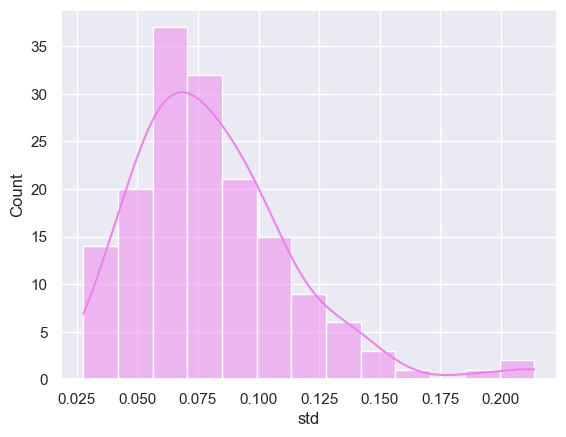

In [44]:
sns.histplot(ratio_agg_data,x='std',kde=True,color='violet')
plt.show()

In [45]:
# 3. 윌콕슨 부호검정
result = stats.wilcoxon(day_ratio_std-day_ratio_std.mean(),alternative='two-sided')
print('검정통계량 : {0}\np-value : {1}'.format(result[0],result[1]))

# 유의 수준 90%에서 귀무가설을 기각할 수 없으므로 평균이 0이라고 할수 있다.

검정통계량 : 5842.0
p-value : 0.2521236678564608


## 3.4 기초구역별 평균

In [83]:
avg_use_day_data = agg_use_day_data.groupby('BAS_ID').mean().reset_index()
avg_use_day_data

,BAS_ID,FLOW_POP_C,FLOW_POP_1,FLOW_POP_2,FLOW_POP_3,FLOW_POP_4,FLOW_POP_6,주중,주말,주중 / 주말
0,21300,13445.327500,13836.395833,13746.390833,13440.322500,14067.842500,9209.265833,54468.436667,23277.108333,2.342449
1,21301,9842.022500,10202.556667,10181.140833,9856.769167,10498.935833,6823.197500,40082.489167,17322.133333,2.315147
2,21302,14276.551667,14731.810000,15102.693333,14658.919167,15280.088333,13172.867500,58769.974167,28452.955833,2.064957
3,21303,4931.063333,5064.240833,5142.564167,4983.965833,5184.928333,3669.488333,20121.834167,8854.416667,2.273528
4,21304,8262.055833,8424.751667,8639.450833,8514.923333,8910.015833,7902.583333,33841.181667,16812.599167,2.016228
...,...,...,...,...,...,...,...,...,...,...
156,21456,5107.703333,5864.721667,5043.917500,4782.270833,4901.204167,9143.528333,20798.613333,14044.732500,1.449448
157,21457,33598.280000,34664.849167,34283.728333,33901.971667,36256.614167,29523.937500,136448.829167,65780.551667,2.072345
158,21458,13704.498333,13920.323333,13483.508333,13612.708333,13967.770000,12193.172500,54721.038333,26160.942500,2.105405
159,21459,28395.107500,29375.652500,29044.575000,28782.542500,30860.297500,28995.067500,115597.877500,59855.365000,1.931703


In [84]:
day_result = basis_area.merge(avg_use_day_data,how='inner',right_on='BAS_ID',left_on='BAS_ID')
day_result = day_result.sort_values(by='BAS_ID').reset_index(drop=True)

store_path = 'C:\\Data Analysis\\부평구 상권분석\\data\\전처리 파일\\기초구역별 요일유동인구.csv'
day_result.to_csv(store_path,index=False,encoding='euc-kr')

# 4. 시간대별 유동인구

In [50]:
pop_by_time_path = '../data/유동인구/부평구 유동인구데이터 및 주거, 직장인구 데이터/부평구 유동인구데이_(201901_202012)/시간대/기초구역별 시간대유동인구'
time_data_name_list = [name for name in os.listdir(pop_by_time_path) if name.endswith('.shp')]
time_data_name_list

['기초구역별_시간대유동인구_201901.shp',
 '기초구역별_시간대유동인구_201902.shp',
 '기초구역별_시간대유동인구_201903.shp',
 '기초구역별_시간대유동인구_201904.shp',
 '기초구역별_시간대유동인구_201905.shp',
 '기초구역별_시간대유동인구_201906.shp',
 '기초구역별_시간대유동인구_201907.shp',
 '기초구역별_시간대유동인구_201908.shp',
 '기초구역별_시간대유동인구_201909.shp',
 '기초구역별_시간대유동인구_201910.shp',
 '기초구역별_시간대유동인구_201911.shp',
 '기초구역별_시간대유동인구_201912.shp']

In [51]:
# 데이터 로딩 및 결합
time_merge_df = gpd.GeoDataFrame(columns=range(39))

for i,name in enumerate(time_data_name_list):
    geo_df = gpd.read_file(os.path.join(pop_by_time_path,name))
    if i ==0:
        time_merge_df.columns = list(geo_df)

    time_merge_df = pd.concat([time_merge_df,geo_df],axis=0,ignore_index=True)
    print('진행률 : {:0.2f}%'.format((i+1)/12*100))
    
time_merge_df.shape

진행률 : 8.33%
진행률 : 16.67%
진행률 : 25.00%
진행률 : 33.33%
진행률 : 41.67%
진행률 : 50.00%
진행률 : 58.33%
진행률 : 66.67%
진행률 : 75.00%
진행률 : 83.33%
진행률 : 91.67%
진행률 : 100.00%


(157155, 39)

In [85]:
time_merge_df.info() # 필요 컬럼 : 1, 10, 14-37

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 157155 entries, 0 to 157154
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   BAS_AR      157155 non-null  float64 
 1   BAS_ID      157155 non-null  object  
 2   BAS_MGT_SN  157155 non-null  object  
 3   CTP_KOR_NM  157155 non-null  object  
 4   MVMN_DE     0 non-null       object  
 5   MVMN_RESN   0 non-null       object  
 6   NTFC_DE     157155 non-null  object  
 7   OPERT_DE    0 non-null       object  
 8   SIG_CD      157155 non-null  object  
 9   SIG_KOR_NM  157155 non-null  object  
 10  STD_YM      157155 non-null  object  
 11  BLOCK_CD    157155 non-null  object  
 12  X_COORD     157155 non-null  object  
 13  Y_COORD     157155 non-null  object  
 14  TMST_00     157155 non-null  object  
 15  TMST_01     157155 non-null  object  
 16  TMST_02     157155 non-null  object  
 17  TMST_03     157155 non-null  object  
 18  TMST_04     1571

In [89]:
use_col = [1,10]+list(range(14,38))

time_use_data = time_merge_df.iloc[:,use_col]
time_use_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 157155 entries, 0 to 157154
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   BAS_ID   157155 non-null  object
 1   STD_YM   157155 non-null  object
 2   TMST_00  157155 non-null  object
 3   TMST_01  157155 non-null  object
 4   TMST_02  157155 non-null  object
 5   TMST_03  157155 non-null  object
 6   TMST_04  157155 non-null  object
 7   TMST_05  157155 non-null  object
 8   TMST_06  157155 non-null  object
 9   TMST_07  157155 non-null  object
 10  TMST_08  157155 non-null  object
 11  TMST_09  157155 non-null  object
 12  TMST_10  157155 non-null  object
 13  TMST_11  157155 non-null  object
 14  TMST_12  157155 non-null  object
 15  TMST_13  157155 non-null  object
 16  TMST_14  157155 non-null  object
 17  TMST_15  157155 non-null  object
 18  TMST_16  157155 non-null  object
 19  TMST_17  157155 non-null  object
 20  TMST_18  157155 non-null  object
 21  TM

In [90]:
time_use_data['STD_YM'] = time_use_data['STD_YM'].apply(lambda x : datetime.strptime(x,'%Y%m'))
time_use_data.iloc[:,2:26] = time_use_data.iloc[:,2:26].astype(float)
time_use_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 157155 entries, 0 to 157154
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   BAS_ID   157155 non-null  object        
 1   STD_YM   157155 non-null  datetime64[ns]
 2   TMST_00  157155 non-null  float64       
 3   TMST_01  157155 non-null  float64       
 4   TMST_02  157155 non-null  float64       
 5   TMST_03  157155 non-null  float64       
 6   TMST_04  157155 non-null  float64       
 7   TMST_05  157155 non-null  float64       
 8   TMST_06  157155 non-null  float64       
 9   TMST_07  157155 non-null  float64       
 10  TMST_08  157155 non-null  float64       
 11  TMST_09  157155 non-null  float64       
 12  TMST_10  157155 non-null  float64       
 13  TMST_11  157155 non-null  float64       
 14  TMST_12  157155 non-null  float64       
 15  TMST_13  157155 non-null  float64       
 16  TMST_14  157155 non-null  float64       
 17  TM

## 4.1 기초구역별, 월별 합계

In [91]:
avg_time_use_data = time_use_data.groupby(['BAS_ID','STD_YM']).sum().reset_index()
avg_time_use_data.head()

,BAS_ID,STD_YM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,21300,2019-01-01,147.75,108.12,68.89,80.07,133.62,258.58,650.48,1287.38,...,781.15,834.29,903.02,1009.68,910.42,549.52,428.75,356.79,286.51,190.89
1,21300,2019-02-01,137.59,107.32,70.35,81.13,130.34,239.40,606.51,1212.31,...,809.42,837.64,845.19,966.92,851.35,569.12,463.63,383.19,295.31,196.85
2,21300,2019-03-01,136.01,112.43,72.34,88.01,134.83,271.48,648.96,1327.14,...,802.20,827.75,901.89,1048.58,915.68,572.44,442.79,393.40,297.60,190.48
3,21300,2019-04-01,145.88,90.23,70.81,65.48,95.24,170.07,370.15,999.31,...,733.05,752.77,798.59,925.72,894.95,681.16,432.65,381.95,304.10,223.15
4,21300,2019-05-01,164.13,102.88,80.38,72.43,100.66,192.16,409.10,990.73,...,758.74,766.76,811.76,949.25,943.22,725.58,474.36,421.74,334.95,240.15


## 4.2 주간인구 / 야간인구 비율 집계

In [92]:
avg_time_use_data['06 to 18'] = avg_time_use_data.iloc[:,8:20].sum(axis=1)
avg_time_use_data['18 to 06'] = avg_time_use_data.iloc[:,3:8].sum(axis=1)+avg_time_use_data.iloc[:,20:26].sum(axis=1)
avg_time_use_data['06 to 18 / 18 to 06'] = avg_time_use_data['06 to 18'] / avg_time_use_data['18 to 06']
avg_time_use_data.iloc[:5,-3:]

,06 to 18,18 to 06,06 to 18 / 18 to 06
0,10132.78,3372.16,3.004834
1,9941.19,3387.99,2.934244
2,10446.20,3491.48,2.991912
3,9190.73,3409.79,2.695395
4,9493.77,3688.51,2.573877


In [93]:
ratio_time_data = avg_time_use_data.groupby('BAS_ID')['06 to 18 / 18 to 06'].agg(['min','mean','max','std']).reset_index()
ratio_time_data

,BAS_ID,min,mean,max,std
0,21300,2.367997,2.695669,3.004834,0.213661
1,21301,2.061719,2.280277,2.558967,0.172801
2,21302,2.056594,2.339853,2.741202,0.239073
3,21303,1.978404,2.246297,2.614028,0.196433
4,21304,1.633418,2.004099,2.404460,0.262214
...,...,...,...,...,...
156,21456,2.240628,3.640312,6.049480,1.283531
157,21457,2.070826,2.291081,2.627604,0.191444
158,21458,1.389223,1.587592,2.055837,0.245302
159,21459,1.922585,2.096614,2.391557,0.166113


## 4.3 일표본 검정

In [62]:
# 1. 정규성 검증

time_std = ratio_time_data['std'].values
result = stats.shapiro(time_std)

print('검정통계량 : {0}\np-value : {1}'.format(result[0],result[1]))

# 정규성을 만족하지 못한다.

검정통계량 : 0.5981689691543579
p-value : 3.1350644109066695e-19


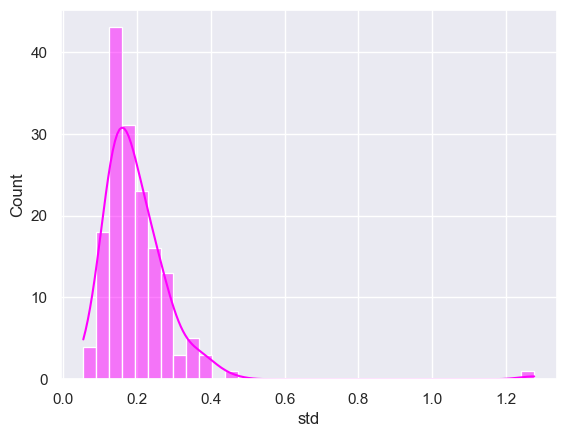

In [63]:
sns.histplot(ratio_time_data,x='std',kde=True,color='magenta')
plt.show()

In [64]:
# 2. 윌콕슨 부호검정 테스트

result = stats.wilcoxon(time_std - time_std.mean(),alternative='two-sided')
print('검정통계량 : {0}\np-value : {1}'.format(result[0],result[1]))

# 따라서 유의수준 99% 수준에서 평균이 0이라고 할수 있다.

검정통계량 : 5217.0
p-value : 0.027798892163617132


## 4.4 기초구역별 평균

In [94]:
avg_time_use_data = avg_time_use_data.groupby('BAS_ID').mean().reset_index()
avg_time_use_data.head()

,BAS_ID,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,...,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,06 to 18,18 to 06,06 to 18 / 18 to 06
0,21300,149.142500,98.246667,74.914167,74.682500,106.797500,198.770833,444.378333,1005.275000,1000.122500,...,920.002500,884.022500,642.962500,440.009167,381.621667,304.509167,218.725833,9210.380833,3425.262500,2.695669
1,21301,122.153333,82.233333,61.239167,60.989167,78.269167,156.160000,316.000000,598.343333,629.742500,...,744.108333,755.526667,531.287500,367.546667,318.660833,255.787500,182.437500,6486.505000,2850.137500,2.280277
2,21302,174.150000,118.495000,90.895833,85.929167,101.938333,212.230000,404.424167,795.480000,899.968333,...,1106.376667,1126.521667,866.605000,620.223333,519.864167,371.973333,261.537500,10195.890000,4376.213333,2.339853
3,21303,66.632500,47.488333,36.955000,34.561667,38.425000,60.557500,135.174167,338.006667,327.225000,...,345.539167,348.850833,270.285833,205.360000,179.147500,137.288333,97.036667,3256.376667,1455.956667,2.246297
4,21304,135.375833,103.880833,82.172500,75.383333,79.327500,115.795833,197.219167,369.311667,477.845000,...,630.695833,656.630833,520.695000,403.756667,342.266667,256.045833,193.241667,5582.596667,2829.196667,2.004099


In [95]:
time_result = basis_area.merge(avg_time_use_data,how='inner',right_on='BAS_ID',left_on='BAS_ID')
time_result = time_result.sort_values(by='BAS_ID').reset_index(drop=True)

store_path = 'C:\\Data Analysis\\부평구 상권분석\\data\\전처리 파일\\기초구역별 시간대유동인구.csv'
time_result.to_csv(store_path,index=False,encoding='euc-kr')